In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

##### Histograms in OpenCV

In [11]:
img = cv2.imread('MountEverest.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [12]:
hist.shape

(256, 1)

In [13]:
print(hist)

[[1.0000e+00]
 [6.0000e+00]
 [2.4000e+01]
 [5.5000e+01]
 [9.8000e+01]
 [1.8000e+02]
 [3.5000e+02]
 [7.3500e+02]
 [1.4510e+03]
 [2.2220e+03]
 [3.4010e+03]
 [4.6670e+03]
 [9.0970e+03]
 [1.8284e+04]
 [2.9792e+04]
 [3.4617e+04]
 [3.2692e+04]
 [2.3960e+04]
 [2.1621e+04]
 [2.0545e+04]
 [1.9947e+04]
 [1.7570e+04]
 [1.5364e+04]
 [1.3257e+04]
 [9.0570e+03]
 [1.0207e+04]
 [1.0692e+04]
 [1.2648e+04]
 [1.2902e+04]
 [1.2635e+04]
 [1.1249e+04]
 [8.2500e+03]
 [8.9470e+03]
 [9.4010e+03]
 [1.1711e+04]
 [1.2292e+04]
 [1.1974e+04]
 [1.0997e+04]
 [7.5090e+03]
 [8.2580e+03]
 [8.8050e+03]
 [9.7740e+03]
 [1.0360e+04]
 [1.0283e+04]
 [9.4500e+03]
 [6.7160e+03]
 [6.7720e+03]
 [7.6290e+03]
 [8.2130e+03]
 [1.0711e+04]
 [1.1338e+04]
 [1.2204e+04]
 [1.4233e+04]
 [1.3731e+04]
 [1.3425e+04]
 [2.0025e+04]
 [1.5171e+04]
 [1.5768e+04]
 [2.1118e+04]
 [1.0836e+04]
 [2.6088e+04]
 [3.2983e+04]
 [2.5996e+04]
 [2.1777e+04]
 [2.6343e+04]
 [1.8012e+04]
 [1.3198e+04]
 [2.2438e+04]
 [2.2277e+04]
 [1.9955e+04]
 [2.4364e+04]
 [1.75

In [15]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [16]:
print(hist)

[    1     6    24    55    98   180   350   735  1451  2222  3401  4667
  9097 18284 29792 34617 32692 23960 21621 20545 19947 17570 15364 13257
  9057 10207 10692 12648 12902 12635 11249  8250  8947  9401 11711 12292
 11974 10997  7509  8258  8805  9774 10360 10283  9450  6716  6772  7629
  8213 10711 11338 12204 14233 13731 13425 20025 15171 15768 21118 10836
 26088 32983 25996 21777 26343 18012 13198 22438 22277 19955 24364 17581
 19374 20980 16415 19889 24357 19779 14916 15204  9240 11744 12532 11180
  7280  7549  7054  5625  5172  5135  5611  5832  6127  5638  4093  3853
  3968  3969  4281  4473  4165  3232  2904  3044  3182  3313  3659  3446
  2875  2387  2662  2512  2876  3000  3009  2312  1997  2170  2289  2598
  2791  2739  2514  1829  1954  2083  2362  2675  2629  2473  1790  1835
  2016  2236  2588  2517  2499  2028  1854  2311  2620  2792  2792  2714
  1916  2112  2438  2564  2792  2707  2654  2092  1994  2403  2789  3131
  3201  3119  2109  2415  2308  3119  3161  3340  3

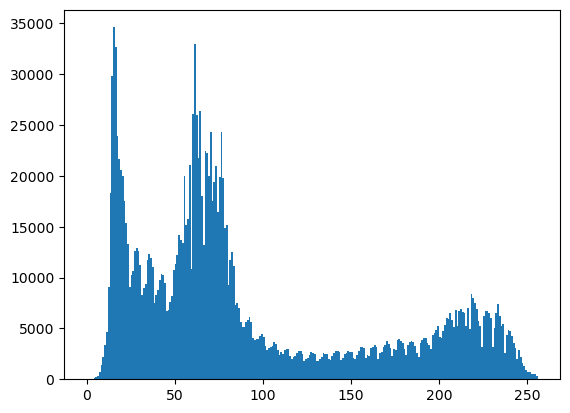

In [17]:
img = cv2.imread('MountEverest.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

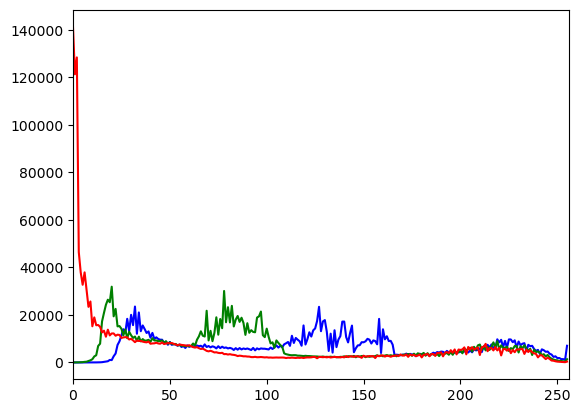

In [19]:
img = cv2.imread('MountEverest.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

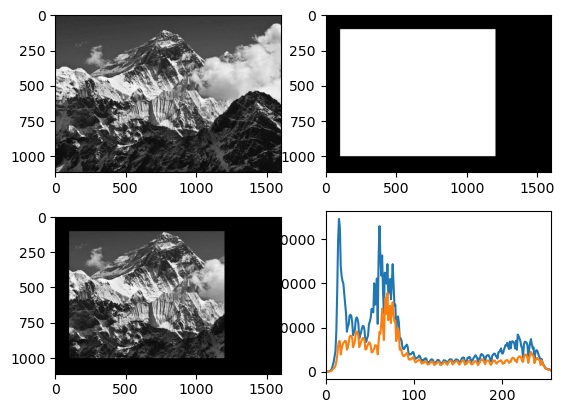

In [26]:
img = cv2.imread('MountEverest.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:1000, 100:1200] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

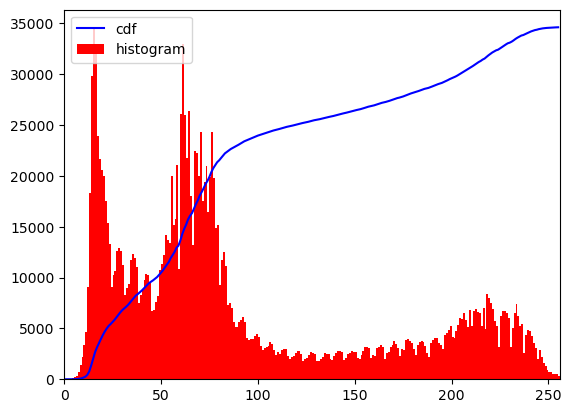

In [81]:
img = cv2.imread('MountEverest.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [82]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [83]:
img2 = cdf[img]

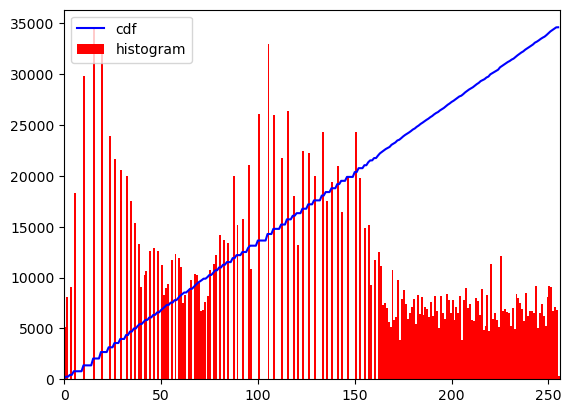

In [84]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [91]:
img = cv2.imread('beach-438500_1280.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

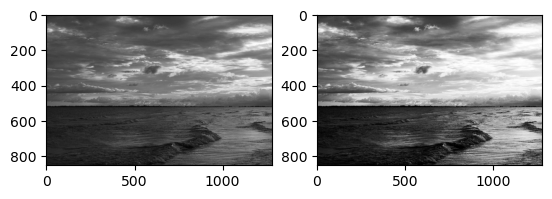

In [92]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(img2, 'gray')
plt.show()

##### Histograms Equalization in OpenCV

In [97]:
img = cv2.imread('MountEverest.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True